In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# 讀取食物營養成分資料
food = pd.read_csv('food_table.csv')
food.head()

,food,Protein,fat,Vitamin C,Fiber
0,Beef,19.42,12.73,0.0,0.0
1,Borage,1.80,0.70,35.0,0.0
2,Cabbage,1.28,0.10,36.6,2.5
3,Chard,1.80,0.20,30.0,1.6
4,Chicken,17.44,8.10,0.0,0.0


In [5]:
# 將dataframe轉成numpy array
food_array = food.values[:,1:5].astype(float)

# 標準化
std = StandardScaler()
food_number_std = std.fit_transform(food_array)

# PCA
pca = PCA(n_components=4)
pca.fit(food_number_std)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca_w = pd.DataFrame()
pca_w['content'] = food.columns[1:]
pca_w['pc1'] = pca.components_[0]
pca_w['pc2'] = pca.components_[1]
pca_w['pc3'] = pca.components_[2]
pca_w['pc4'] = pca.components_[3]
pca_w

,content,pc1,pc2,pc3,pc4
0,Protein,0.535869,0.371633,-0.029084,-0.757554
1,fat,0.502184,0.580700,-0.013782,0.640631
2,Vitamin C,-0.483022,0.484500,-0.725363,-0.076145
3,Fiber,-0.476808,0.538456,0.687614,-0.099527


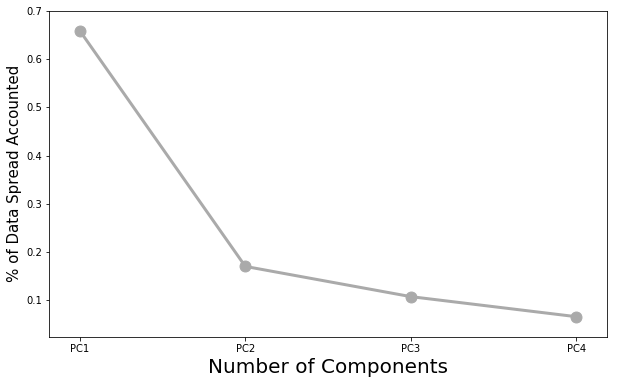

In [9]:
# 變異解釋百分比
ratio = pca.explained_variance_ratio_
plt.style.use('seaborn-bright')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

# 設置x, y軸
xx = [1, 2, 3, 4]
x_trick = ['PC1', 'PC2', 'PC3', 'PC4',]
ax.set_xticks(xx)
ax.set_xticklabels(x_trick)

plt.plot(xx, ratio, c='#AAAAAA', lw=3)
plt.scatter(xx, ratio, marker='o', c='#AAAAAA', s=120)

# 設置坐標軸的字體大小
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

# 坐標軸名稱
plt.xlabel('Number of Components', fontsize=20)
plt.ylabel('% of Data Spread Accounted', fontsize=15)
plt.show()